In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

21879.625
640000.0 40960000.0


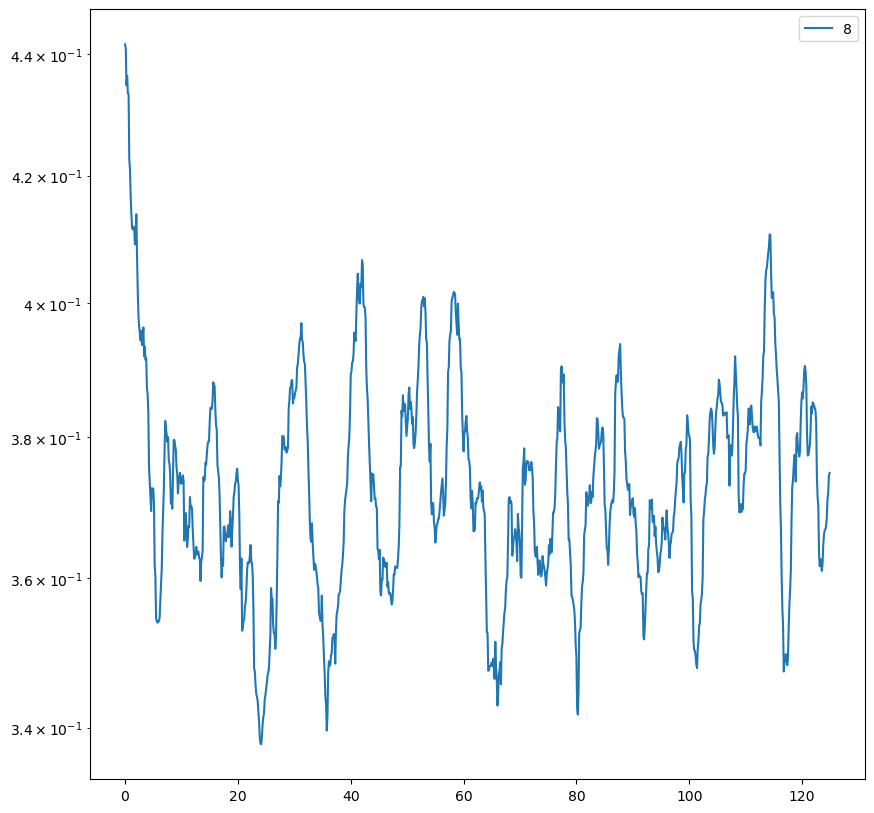

In [240]:
ecmc_ff_8_df = pd.read_csv("../ecmc_ff_sf_var_10m-8-m3.csv")
ecmc_ff_8_events = np.array(ecmc_ff_8_df["events"].to_list())
ecmc_ff_8_mix = np.array(ecmc_ff_8_df["var_mix"].to_list())

ecmc_ff_8_2_df = pd.read_csv("../ecmc_ff_sf_var_10m-128-m3-2.csv")
ecmc_ff_8_2_events = np.array(ecmc_ff_8_2_df["events"].to_list())
ecmc_ff_8_2_mix = np.array(ecmc_ff_8_2_df["var_mix"].to_list())

ecmc_ff_16_df = pd.read_csv("../ecmc_ff_sf_var_10m-16-m3.csv")
ecmc_ff_16_events = np.array(ecmc_ff_16_df["events"].to_list())
ecmc_ff_16_mix = np.array(ecmc_ff_16_df["var_mix"].to_list())

ecmc_ff_32_df = pd.read_csv("../ecmc_ff_sf_var_10m-32-m3.csv")
ecmc_ff_32_events = np.array(ecmc_ff_32_df["events"].to_list())
ecmc_ff_32_mix = np.array(ecmc_ff_32_df["var_mix"].to_list())

ecmc_ff_64_df = pd.read_csv("../ecmc_ff_sf_var_10m-64-m3.csv")
ecmc_ff_64_events = np.array(ecmc_ff_64_df["events"].to_list())
ecmc_ff_64_mix = np.array(ecmc_ff_64_df["var_mix"].to_list())

ecmc_ff_128_df = pd.read_csv("../ecmc_ff_sf_var_10m-128-m3.csv")
ecmc_ff_128_events = np.array(ecmc_ff_128_df["events"].to_list())
ecmc_ff_128_mix = np.array(ecmc_ff_128_df["var_mix"].to_list())

ecmc_ff_256_df = pd.read_csv("../ecmc_ff_sf_var_10m-256-m2.csv")
ecmc_ff_256_events = np.array(ecmc_ff_256_df["events"].to_list())
ecmc_ff_256_mix = np.array(ecmc_ff_256_df["var_mix"].to_list())

ecmc_ff_8d_df = pd.read_csv("../ecmc_ff_sf_var_10m-8-m3.csv")
ecmc_ff_8d_events = np.array(ecmc_ff_8d_df["events"].to_list())
ecmc_ff_8d_mix = np.array(ecmc_ff_8d_df["var_mix"].to_list())

ecmc_ff_64d_df = pd.read_csv("../ecmc_ff_sf_var_10m-64-d.csv")
ecmc_ff_64d_events = np.array(ecmc_ff_64d_df["events"].to_list())
ecmc_ff_64d_mix = np.array(ecmc_ff_64d_df["var_mix"].to_list())

ecmc_ff_8da_df = pd.read_csv("../ecmc_ff_sf_var_10m-8-da.csv")
ecmc_ff_8da_events = np.array(ecmc_ff_8da_df["events"].to_list())
ecmc_ff_8da_mix = np.array(ecmc_ff_8da_df["var_mix"].to_list())


# x_64 = np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_64_events)/64
x_256 = np.linspace(0, np.sum(ecmc_ff_256_events), np.sum(ecmc_ff_256_events))/256
x_128 = np.linspace(0, np.sum(ecmc_ff_128_events), np.sum(ecmc_ff_128_events))/128
x_64 = np.linspace(0, np.sum(ecmc_ff_64_events), np.sum(ecmc_ff_64_events))/64
x_32 = np.linspace(0, np.sum(ecmc_ff_32_events), np.sum(ecmc_ff_32_events))/32
x_16 = np.linspace(0, np.sum(ecmc_ff_16_events), np.sum(ecmc_ff_16_events))/16
x_8 = np.linspace(0, np.sum(ecmc_ff_8_events), np.sum(ecmc_ff_8_events))/8
print(np.sum(ecmc_ff_8_events)/8)

fig, ax = plt.subplots(1, figsize=(10, 10))
# ax[0].plot(x_64[:20], ecmc_ff_64_mix[:20]/64)
# ax[1].plot(x_8, ecmc_ff_8_mix/8)

# EXACT equilibrium variance given by: N^2 * l_free^2/4
def calculate_var_equil(n_particles):

    diameter = 400/(2*n_particles)

    return n_particles**2 * (400 - n_particles * diameter)**2/(4)
var_equil_8 = calculate_var_equil(8)
var_equil_16 = calculate_var_equil(16)
var_equil_32 = calculate_var_equil(32)
var_equil_64 = calculate_var_equil(64)
var_equil_128 = calculate_var_equil(128)
var_equil_256 = calculate_var_equil(256)

print(var_equil_8, var_equil_64)

ax.plot(x_8[:1000], np.mean([ecmc_ff_8_mix, ecmc_ff_8_2_mix], axis=0)[:1000]/var_equil_8, label="8")
# ax.plot(x_8[:3000], ecmc_ff_8d_mix[:3000]/var_equil_8, label="8 s")
# ax.plot(x_16[:5000], ecmc_ff_16_mix[:5000]/var_equil_16, label="16")
# ax.plot(x_32[:10000], ecmc_ff_32_mix[:10000]/var_equil_32, label="32")
# ax.plot(x_64[:10000], ecmc_ff_64_mix[:10000]/var_equil_64, label="64")
# ax.plot(x_128[:1000], ecmc_ff_128_mix[:1000]/var_equil_128, label="128")
# ax.plot(x_256[:10000], ecmc_ff_256_mix[:10000]/var_equil_256, label="64")

# ax[0][1].plot(x_8[:20], ecmc_ff_8d_mix[:20]/var_equil_8)
# ax[1][1].plot(x_64[:100], ecmc_ff_64d_mix[:100])
# plt.plot(np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_64_events)/64, ecmc_ff_64_mix/64)
# plt.plot(np.linspace(0, 100000, 100001)*np.mean(ecmc_ff_8_events)/8, ecmc_ff_8_mix/8)

ax.legend()
ax.set_yscale('log')
# ax.set_xscale('log')

[200.0, 0.0, 200.0, 200.0] 7500.0 150.0


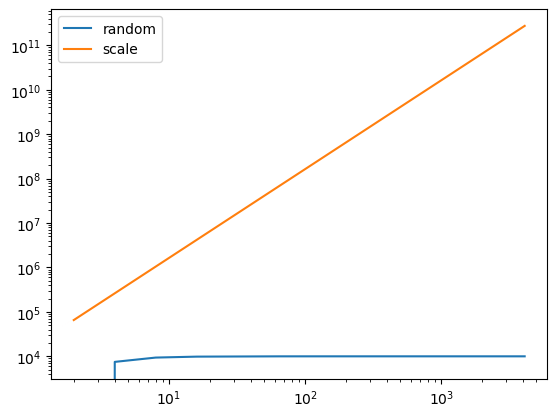

In [391]:
def sum_u(n_particles, t = "rand"):
    length = 400
    diameter = length/(2*n_particles)
    x_pos = [diameter/2 + (i-1)*diameter for i in range(1, n_particles + 1)]
    # 
    # x_prime = [x_0 if x_0 >= x_pos[0] else x_0 + length for x_0 in x_pos]
    x_uniform = [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]
    #print("uniform", x_pos)
    u = []

    def delta_i(i):
        #print("particle pairs ", (i-1)%n_particles, (i-2)%n_particles)
        a_i =  0
        a_j = 0

        # if i - 1  > n_particles:
        #     #print(i)
        #     a_i = length
        # if i - 2 < 0:
        #     a_j = -length
        # if i - 2  > n_particles:
        #     a_j = length

        a = x_pos[(i-1)%n_particles] + a_i - (x_pos[(i-2)%n_particles] + a_j) - diameter
        b = x_uniform[(i-1)%n_particles] + a_i - (x_uniform[(i-2)%n_particles] + a_j) - diameter

        # a = x_pos[int((i+n_particles/2))%n_particles] + a_i - (x_pos[(i-1)%n_particles] + a_j) - ((n_particles + 1) * diameter)
        # b = x_uniform[int(((i+n_particles/2)))%n_particles] + a_i - (x_uniform[(i-1)%n_particles] + a_j) - ((n_particles + 1) * diameter)
        # if i-1 < 0:
        #     a -= length
        # if i-1 > n_particles:
        #     a += length
        # if i > n_particles:
        #     a+= length
        #print("delta calc", a, x_pos[(i-1)%n_particles] + a_i, - (x_pos[(i-2)%n_particles] + a_j), -diameter)

        if t == "rand":
            return np.abs(a)
        elif t == "uni":
            return b
    
    for j in range(1, n_particles + 1):
        u_i = 0
        for i in range(0, int(n_particles/2) + 1):
            #print("idx", j, i)
            u_i += delta_i(i+j)
            #print(i)
        u.append(u_i)
    return u

p_size = [2, 4, 8, 16, 64, 128, 256, 512, 1024, 2048, 4096]
s4 = sum_u(4)
print(s4, np.var(s4), np.mean(s4))
# p_size = [4]
plt.plot(p_size, np.array([np.var(sum_u(i, t="rand")) for i in p_size]), label="random")
# # plt.plot(p_size, np.array([np.var(sum_u(i, t="uni")) for i in p_size]), label="uni")
plt.plot(p_size, (np.array(p_size)*128)**2, label="scale")
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [432]:
def sum_w(n_particles):
    length = 400
    diameter = length/(2*n_particles)

    # compact dist
    x_compact = np.array([diameter/2 + i*diameter for i in range(0, n_particles)])

    #uniform dist
    #x_compact= [length/n_particles * i  - diameter/2 for i in range(1,n_particles + 1)]

    #print(x_compact)

    w = []
    # go through particles 1,...,N
    # go through sum k=0^N/2
    for i in range(0, n_particles ):
        w_i = 0
        for j in range(0, int(n_particles/2) + 1):
        #     #print((i+j-1)%n_particles,(i+j-2)%n_particles, i, i+j)
        #     #print(x_compact[(i+j - 1)%n_particles], x_compact[(i+j - 2)%n_particles])
            d_i = (x_compact[(i+j - 1)%n_particles] - x_compact[(i+j - 2)%n_particles]) - diameter
        #     if d_i >= 0:
        #         w_i += d_i
            w_i += d_i
        w.append(w_i)

        # for j in range(i + int(n_particles/2), i, -1):
        #     #print(i, j)
        #     #print(x_compact[(j-1)%n_particles] - x_compact[(j-2)%n_particles] - diameter)
        #     w_i += x_compact[(j-1)%n_particles] - x_compact[(j-2)%n_particles] - diameter
            
        #print("final wi ", w_i)
        #w.append(w_i/200)
    
    return w

w = sum_w(8)
print(w)
print(np.var(w), np.mean(w))
# print(np.var(w))
p_size = [2, 4, 8, 16, 64, 128, 256, 512, 1024, 2048, 4096]
# arr = np.array([np.var(sum_w(i)) for i in p_size])
# s4 = sum_w(4)
# # p_size = [4]
plt.plot(p_size, np.array([np.var(sum_w(i)) for i in p_size]), label="random")
# # plt.plot(p_size, np.array([np.var(sum_u(i, t="uni")) for i in p_size]), label="uni")
# plt.plot(p_size, (np.array(p_size)*128)**2, label="scale")
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()

[-200.0, -200.0, 0.0, 0.0, 0.0, -200.0, -200.0, -200.0]
9375.0 -125.0
